# EVal

In [35]:
# I/O
import os
import glob
import json
import zlib
import base64

# Analysis
import pandas as pd
import scanpy as sc
import loompy as lp
import umap

# Load SCENIC results

In [14]:
EXP_LOOM = "/cellar/users/aklie/projects/igvf/topic_grn_links/data/mouse_adrenal/preprocessed/snrna/adrenal_Parse_10x_integrated_RNA_subset.loom"
OUT = "/cellar/users/aklie/projects/igvf/topic_grn_links/grn_inference/mouse_adrenal/scenic/result/pipeline_subset"

## adata object

In [8]:
adata = sc.read(EXP_LOOM, validate=False)
genes = adata.var.index
cells = adata.obs.index

In [63]:
adata.obs

,nGene,nUMI
CellID,,
CCAGTTCAGTGTTCTA_15.ENCLB366QRE,2927,7435.065290
TGAAGAGAAGTGGTCA_30.ENCLB856JIZ,1094,2049.514210
TCTTCACAAAACATCG_4.ENCLB071PVC,1738,3171.499977
TCTTCACAAAGGTACA_12.ENCLB048AFA,1362,1996.000000
AGATGTACAGTACAAG_44.ENCLB391MDC,647,851.000000
...,...,...
TCCTCAATCCCATAAA.ENCLB495DSX,1745,2834.000000
CAACCACAGAATCTGA_2.ENCLB486GRF,3134,7357.038148
AACTCACCGTACGCAA_20.ENCLB804GBP,962,1439.007812


In [64]:
adata.var

""
Gene
Xkr4
Gm1992
Gm19938
Gm37381
Rp1
...
AC125178.3
Gm16367
AC163611.2


## GRN Inference

In [19]:
from utils import parse_adj

In [16]:
files = sorted(glob.glob(os.path.join(OUT, "*_run*_adj.tsv")))
files

['/cellar/users/aklie/projects/igvf/topic_grn_links/grn_inference/mouse_adrenal/scenic/result/pipeline_subset/adrenal_Parse_10x_integrated_RNA_subset_run1_adj.tsv',
 '/cellar/users/aklie/projects/igvf/topic_grn_links/grn_inference/mouse_adrenal/scenic/result/pipeline_subset/adrenal_Parse_10x_integrated_RNA_subset_run2_adj.tsv',
 '/cellar/users/aklie/projects/igvf/topic_grn_links/grn_inference/mouse_adrenal/scenic/result/pipeline_subset/adrenal_Parse_10x_integrated_RNA_subset_run3_adj.tsv',
 '/cellar/users/aklie/projects/igvf/topic_grn_links/grn_inference/mouse_adrenal/scenic/result/pipeline_subset/adrenal_Parse_10x_integrated_RNA_subset_run4_adj.tsv',
 '/cellar/users/aklie/projects/igvf/topic_grn_links/grn_inference/mouse_adrenal/scenic/result/pipeline_subset/adrenal_Parse_10x_integrated_RNA_subset_run5_adj.tsv']

In [21]:
multi_adj, ranked_genes = parse_adj(files, tfs=None)

/cellar/users/aklie/projects/igvf/topic_grn_links/grn_inference/mouse_adrenal/scenic/utils.py:39: PerformanceWarning: dropping on a non-lexsorted multi-index without a level parameter may impact performance.
  ranks = ranks.reset_index().sort_values(["TF"]).groupby(["TF"], sort=False).apply(lambda x: x.sort_values(("rank", "mean"), ascending=True)).drop("TF", axis=1)


In [22]:
multi_adj

,TF,target,importance,file,rank
0,Thrb,Prr16,3.365477e+02,/cellar/users/aklie/projects/igvf/topic_grn_li...,1
1,Thrb,Frmd5,3.336626e+02,/cellar/users/aklie/projects/igvf/topic_grn_li...,2
2,Thrb,Nrep,3.239047e+02,/cellar/users/aklie/projects/igvf/topic_grn_li...,3
3,Thrb,Gpam,2.838669e+02,/cellar/users/aklie/projects/igvf/topic_grn_li...,4
4,Thrb,Gramd1b,2.726003e+02,/cellar/users/aklie/projects/igvf/topic_grn_li...,5
...,...,...,...,...,...
514484,Rxra,Tusc1,5.097908e-15,/cellar/users/aklie/projects/igvf/topic_grn_li...,24908
514485,Rxra,Cd63,3.852184e-15,/cellar/users/aklie/projects/igvf/topic_grn_li...,24909
514486,Hoxa9,Slamf9,2.825805e-15,/cellar/users/aklie/projects/igvf/topic_grn_li...,21586
514487,Zfp128,Rnf31,1.519588e-15,/cellar/users/aklie/projects/igvf/topic_grn_li...,24793


In [23]:
ranked_genes

TF      target          rank    importance              
                                    mean          mean           std
0         Egr1        Rgcc      1.600000  6.570198e+01  6.840788e+00
1         Egr1        Rab7      6.200000  5.231299e+01  8.394938e+00
2         Egr1   Tnfrsf11a      7.400000  5.401561e+01  1.452708e+01
3         Egr1       Itgb3      8.600000  4.801195e+01  7.713902e+00
4         Egr1      Gimap8      9.200000  4.543657e+01  3.831221e+00
...        ...         ...           ...           ...           ...
523327  Zfp853     Hsd17b2  21281.250000  1.018860e-08  6.979673e-09
523328  Zfp853      Gm7895  21310.000000  3.497025e-09  1.487052e-09
523329  Zfp853  AC129309.1  21319.000000  1.130124e-08  0.000000e+00
523330  Zfp853     Gm42775  21331.666667  1.122555e-08  1.115096e-08
523331  Zfp853     Gm47765  21425.000000  3.203614e-09  0.000000e+00

[523332 rows x 5 columns]

## Loom files - regulons and AUC

In [24]:
from utils import parse_loom

In [56]:
files = sorted(glob.glob(os.path.join(OUT, "*_run*_pyscenic_output.loom")))
files

['/cellar/users/aklie/projects/igvf/topic_grn_links/grn_inference/mouse_adrenal/scenic/result/pipeline_subset/adrenal_Parse_10x_integrated_RNA_subset_run1_pyscenic_output.loom',
 '/cellar/users/aklie/projects/igvf/topic_grn_links/grn_inference/mouse_adrenal/scenic/result/pipeline_subset/adrenal_Parse_10x_integrated_RNA_subset_run2_pyscenic_output.loom',
 '/cellar/users/aklie/projects/igvf/topic_grn_links/grn_inference/mouse_adrenal/scenic/result/pipeline_subset/adrenal_Parse_10x_integrated_RNA_subset_run3_pyscenic_output.loom',
 '/cellar/users/aklie/projects/igvf/topic_grn_links/grn_inference/mouse_adrenal/scenic/result/pipeline_subset/adrenal_Parse_10x_integrated_RNA_subset_run4_pyscenic_output.loom',
 '/cellar/users/aklie/projects/igvf/topic_grn_links/grn_inference/mouse_adrenal/scenic/result/pipeline_subset/adrenal_Parse_10x_integrated_RNA_subset_run5_pyscenic_output.loom']

In [57]:
tf_regulons, tf_activities = parse_loom(files, tf="Egr1", cells=cells, genes=genes)

/cellar/users/aklie/projects/igvf/topic_grn_links/grn_inference/mouse_adrenal/scenic/result/pipeline_subset/adrenal_Parse_10x_integrated_RNA_subset_run1_pyscenic_output.loom
/cellar/users/aklie/projects/igvf/topic_grn_links/grn_inference/mouse_adrenal/scenic/result/pipeline_subset/adrenal_Parse_10x_integrated_RNA_subset_run2_pyscenic_output.loom
/cellar/users/aklie/projects/igvf/topic_grn_links/grn_inference/mouse_adrenal/scenic/result/pipeline_subset/adrenal_Parse_10x_integrated_RNA_subset_run3_pyscenic_output.loom
/cellar/users/aklie/projects/igvf/topic_grn_links/grn_inference/mouse_adrenal/scenic/result/pipeline_subset/adrenal_Parse_10x_integrated_RNA_subset_run4_pyscenic_output.loom
/cellar/users/aklie/projects/igvf/topic_grn_links/grn_inference/mouse_adrenal/scenic/result/pipeline_subset/adrenal_Parse_10x_integrated_RNA_subset_run5_pyscenic_output.loom


## Visualize the AUC matrix

In [58]:
files[0]

'/cellar/users/aklie/projects/igvf/topic_grn_links/grn_inference/mouse_adrenal/scenic/result/pipeline_subset/adrenal_Parse_10x_integrated_RNA_subset_run1_pyscenic_output.loom'

In [59]:

    
# collect SCENIC AUCell output
lf = lp.connect(files[0], mode='r+', validate=False )
meta = json.loads(zlib.decompress(base64.b64decode( lf.attrs.MetaData )))
exprMat = pd.DataFrame( lf[:,:], index=lf.ra.Gene, columns=lf.ca.CellID).T
auc_mtx = pd.DataFrame( lf.ca.RegulonsAUC, index=lf.ca.CellID)

# create a dictionary of regulons:
regulons = {}
for i,r in pd.DataFrame(lf.ra.Regulons,index=lf.ra.Gene).iteritems():
    regulons[i] =  list(r[r==1].index.values)
lf.close()

In [60]:
regulons["Egr1(+)"][:5]

['Atp6v1h', 'Pcmtd1', 'Ube2w', 'Paqr8', 'Smap1']

In [61]:
auc_mtx["Egr1(+)"]

CCAGTTCAGTGTTCTA_15.ENCLB366QRE    0.140032
TGAAGAGAAGTGGTCA_30.ENCLB856JIZ    0.102827
TCTTCACAAAACATCG_4.ENCLB071PVC     0.130238
TCTTCACAAAGGTACA_12.ENCLB048AFA    0.120730
AGATGTACAGTACAAG_44.ENCLB391MDC    0.060324
                                     ...   
TCCTCAATCCCATAAA.ENCLB495DSX       0.151293
CAACCACAGAATCTGA_2.ENCLB486GRF     0.121861
AACTCACCGTACGCAA_20.ENCLB804GBP    0.113921
ATCACAATCGGCTATG.ENCLB663TUU       0.135487
CGCATACACCTCCTGA_32.ENCLB391MDC    0.139932
Name: Egr1(+), Length: 1000, dtype: float64

In [49]:
# UMAP
run_umap = umap.UMAP(n_neighbors=10, min_dist=0.4, metric='correlation').fit_transform

In [50]:
dr_umap = run_umap(auc_mtx)

In [51]:
umap_df = pd.DataFrame(dr_umap, columns=['X', 'Y'], index=auc_mtx.index)

In [52]:
umap_df

,X,Y
CCAGTTCAGTGTTCTA_15.ENCLB366QRE,10.015979,5.963696
TGAAGAGAAGTGGTCA_30.ENCLB856JIZ,7.532521,6.314390
TCTTCACAAAACATCG_4.ENCLB071PVC,7.890351,9.043627
TCTTCACAAAGGTACA_12.ENCLB048AFA,10.315470,7.361802
AGATGTACAGTACAAG_44.ENCLB391MDC,-0.333069,1.909874
...,...,...
TCCTCAATCCCATAAA.ENCLB495DSX,7.931654,0.261038
CAACCACAGAATCTGA_2.ENCLB486GRF,8.877005,6.303806
AACTCACCGTACGCAA_20.ENCLB804GBP,8.057991,10.467656
ATCACAATCGGCTATG.ENCLB663TUU,13.474362,8.404571


In [53]:
import matplotlib.pyplot as plt

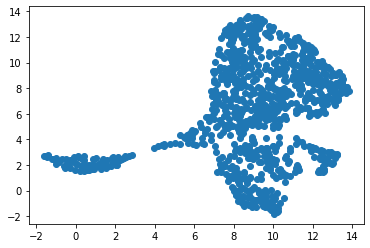

In [54]:
plt.scatter(umap_df["X"], umap_df["Y"])